# Python Code for Analyzing Glassdoor Data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
G= pd.read_csv('employee_reviews.csv', encoding='ISO-8859-1')

First, need to clean data.

In [3]:
G = G.rename(columns={'company' : 'Company', 'location' : 'Location', 'job-title' : 'Job Title', \
                      'overall-ratings' : 'Overall Ratings', 'work-balance-stars' : 'Work/Life Balance', \
                      'culture-values-stars' : 'Culture/Values', 'carrer-opportunities-stars': 'Career Opportunities', \
                      'comp-benefit-stars' : 'Comp/Benefits', 'senior-mangemnet-stars' : 'Senior Management', \
                      'helpful-count' : 'Helpful Count'})

In [4]:
Gd= G.drop(['link', 'Unnamed: 0'], axis=1)

In [5]:
Gd.iloc[[7819],2] = 'Feb 23, 2018'
Gd.iloc[[28729],2]= 'Dec 26, 2017'
Gd.iloc[[40862],2] = 'May 31, 2016'
Gd.iloc[[36104],2] = 'Nov 30, 2015'

In [6]:
time= Gd['dates']
d=pd.to_datetime(time)
e= d.to_frame(name= 'Date')

In [7]:
G= pd.concat([Gd, e], axis=1)

In [8]:
G= G.drop(G.columns[2], axis=1)

In [9]:
G= G[['Company','Date','Location','Job Title','summary', 'pros', 'cons', 'advice-to-mgmt','Overall Ratings',\
      'Work/Life Balance','Culture/Values', 'Career Opportunities','Comp/Benefits', \
      'Senior Management','Helpful Count']]

In [10]:
G= G.drop_duplicates()

In [11]:
G_time=G.set_index('Date')

I decided I will group the data from the years (2013-2018), as prior to those years, Culture/Values were not available as a rating.

In [12]:
G_time= G_time.loc['2013-01-01':'2018-12-11']

In [13]:
G= G_time.reset_index()

I also decided to group the data by reviews with at least 5 Helpful counts.

In [14]:
G_sample= G.loc[G['Helpful Count']>=5]

Another issue I noticed is that there are numerous null scores in the data, so I decided to make a t-test to see if there is a huge difference between using the "Overall Rating" score for each row, or the average score from each rating to just ignoring the null values.

In [15]:
G_test_ovr= G_sample[['Overall Ratings','Work/Life Balance','Culture/Values', 'Career Opportunities','Comp/Benefits', \
      'Senior Management','Helpful Count']].replace('none', np.nan).astype(float)

In [16]:
G_test_ovr['Work/Life Balance'].fillna(G_test_ovr['Overall Ratings'],inplace=True)
G_test_ovr['Culture/Values'].fillna(G_test_ovr['Overall Ratings'],inplace=True)
G_test_ovr['Career Opportunities'].fillna(G_test_ovr['Overall Ratings'],inplace=True)
G_test_ovr['Comp/Benefits'].fillna(G_test_ovr['Overall Ratings'],inplace=True)
G_test_ovr['Senior Management'].fillna(G_test_ovr['Overall Ratings'],inplace=True)

In [17]:
G_nan= G_sample[['Overall Ratings','Work/Life Balance','Culture/Values', 'Career Opportunities','Comp/Benefits', \
      'Senior Management','Helpful Count']].replace('none', np.nan).astype(float)

In [18]:
round(G_nan.mean(), 2)

Overall Ratings          2.67
Work/Life Balance        2.31
Culture/Values           2.71
Career Opportunities     2.79
Comp/Benefits            3.47
Senior Management        2.39
Helpful Count           15.33
dtype: float64

In [19]:
a= G_nan[['Work/Life Balance']].fillna(2.31)
b= G_nan[['Culture/Values']].fillna(2.71)
c= G_nan[['Career Opportunities']].fillna(2.79)
d= G_nan[['Comp/Benefits']].fillna(3.47)
e= G_nan[['Senior Management']].fillna(2.39)
g= [G_nan['Overall Ratings'],a,b,c,d,e,G_nan['Helpful Count']]
G_avg=pd.concat(g, axis=1)

In [20]:
stats.ttest_ind(G_test_ovr, G_nan, axis= 0, nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=masked_array(data=[0.0, 0.24547795122598667, -0.03161037327686043,
                   -0.17420714930322023, -0.6713398570707527,
                   0.3766021364505536, 0.0],
             mask=[False, False, False, False, False, False, False],
       fill_value=1e+20), pvalue=masked_array(data=[1.        , 0.80609529, 0.97478389, 0.86170892,
                   0.50203148, 0.70648351, 1.        ],
             mask=False,
       fill_value=1e+20))

In [21]:
stats.ttest_ind(G_avg, G_nan, axis= 0, nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=masked_array(data=[0.0, -0.0019184070759228845, -0.0019573863117548886,
                   -0.0006342153034948777, 0.0015731860389997803,
                   0.0011389964791634379, 0.0],
             mask=[False, False, False, False, False, False, False],
       fill_value=1e+20), pvalue=masked_array(data=[1.        , 0.9984694 , 0.9984383 , 0.99949399,
                   0.99874484, 0.99909125, 1.        ],
             mask=False,
       fill_value=1e+20))

The average score for each rating is closer overall to just leaving the values null, so I will replace each null with it's rating average score.

In [22]:
G_sample[['Overall Ratings','Work/Life Balance','Culture/Values', 'Career Opportunities','Comp/Benefits', \
      'Senior Management','Helpful Count']] = \
G_avg[['Overall Ratings','Work/Life Balance','Culture/Values', 'Career Opportunities','Comp/Benefits', \
      'Senior Management','Helpful Count']]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


I will separate the group that I have to use for different graphs. First I will look at the average score of each rating for each company, and of all the companies.

In [23]:
G_sample1= G_sample.drop(['summary', 'pros', 'cons', 'advice-to-mgmt','Helpful Count'], axis=1)

In [24]:
Company_g= round(G_sample1.groupby('Company').agg('mean'), 2)

In [25]:
Company_group= Company_g.reset_index()

In [26]:
Company_groups= Company_group.drop('Overall Ratings', axis=1)

In [27]:
round(Company_groups.mean(), 2)

Work/Life Balance       2.58
Culture/Values          2.88
Career Opportunities    2.82
Comp/Benefits           3.72
Senior Management       2.52
dtype: float64

In [28]:
Total={'Company': 'All Companies', 'Work/Life Balance': 2.58, 'Culture/Values': 2.88, 'Career Opportunities': 2.83, \
       'Comp/Benefits': 3.72, 'Senior Management': 2.52}
Company_groups= Company_groups.append(Total, ignore_index=True)
Company_groups['Company']= Company_groups['Company'].str.title()

In [29]:
Company_group_fin= Company_groups.set_index('Company')

<AxesSubplot:title={'center':'Average Score of Ratings Per Company'}, xlabel='Company', ylabel='Score'>

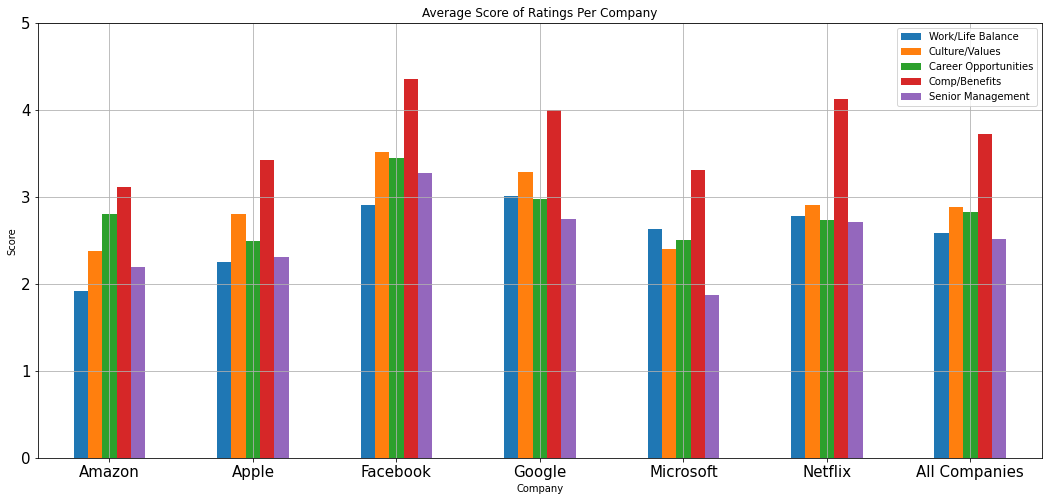

In [30]:
Company_group_fin.plot.bar(figsize= (18,8), title= 'Average Score of Ratings Per Company', xlabel= 'Company', \
                           ylabel= 'Score', rot=0, grid=1, fontsize=15, ylim=(0,5))

Looks like Senior Management, and Work/Life balance are top two priorities of the companies overall.

Now we will look at the change in the average score over time for each rating.

In [31]:
Date_g= round(G_sample1.groupby([pd.Grouper(key='Date',freq='Y')]).agg('mean'), 2)

In [32]:
Dates= Date_g.reset_index()
Dates['Date']= Dates['Date'].map(lambda x: x.year)

<AxesSubplot:title={'center':'Average Score of Ratings over Time'}, xlabel='Date', ylabel='Score'>

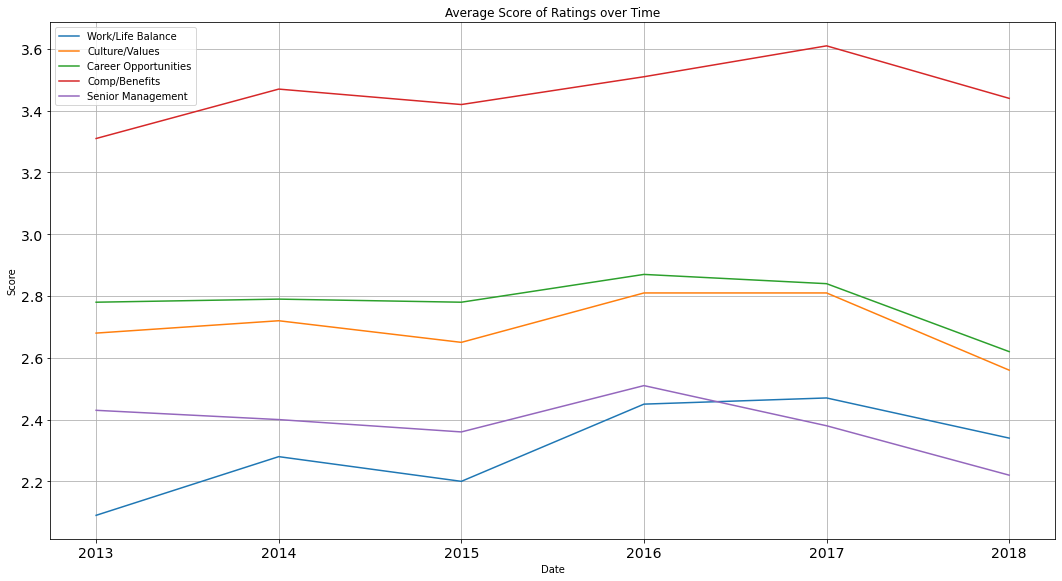

In [33]:
Dates.plot(x= 'Date', y= ['Work/Life Balance','Culture/Values','Career Opportunities','Comp/Benefits',\
                          'Senior Management'], figsize= (18,9.5), title=('Average Score of Ratings over Time'),\
                           ylabel='Score', fontsize=14, grid=1)

It does look like the scores change well over time, especially in the last year.

Finally, just a bar graph to show that it is better to look at the individual ratings instead of just the overall rating.

In [34]:
G_sample3= G_sample.drop(['summary', 'pros', 'cons', 'advice-to-mgmt','Helpful Count', 'Date','Location','Job Title',\
                          'Company'], axis=1)

In [35]:
a= round(G_sample3.mean(),2)
w= a.to_frame(name= 'Average')

<AxesSubplot:title={'center':'Average Scores for Each Rating'}, xlabel='Rating', ylabel='Score'>

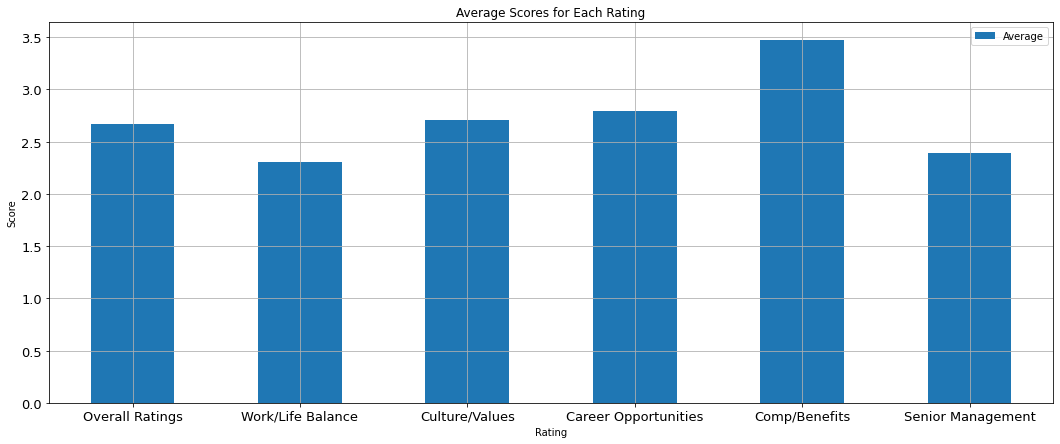

In [36]:
w.plot.bar(figsize= (18,7), title= 'Average Scores for Each Rating', xlabel= 'Rating', ylabel= 'Score', rot=0,\
           fontsize=13, grid=1)